<a href="https://colab.research.google.com/github/Tudou77/DS440/blob/main/base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## load data

In [ ]:
import requests
import pandas as pd
from io import StringIO
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure

from sklearn.ensemble import RandomForestClassifier
url="https://drive.google.com/file/d/1gVK-eB8V7t4G6Osp90BgLTNRI5EhsI10/view?usp=sharing"

In [ ]:
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df = pd.read_csv(csv_raw)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Team,Season,Name,DL_length,team_id,player_id,Age,W,L,ERA,...,wSL_C_pi,wXX_C_pi,O_Swing_pct_pi,Z_Swing_pct_pi,Swing_pct_pi,O_Contact_pct_pi,Z_Contact_pct_pi,Contact_pct_pi,Zone_pct_pi,Pace_pi
0,Nationals,2006,Ryan Drese,15,WAS,dresr001,30,0,2,5.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Royals,2006,Runelvys Hernandez,15,KCA,hernr003,28,6,10,6.48,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cubs,2006,Kerry Wood,15,CHN,woodk002,29,1,2,4.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cubs,2006,Mark Prior,15,CHN,priom001,25,1,6,7.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Phillies,2006,Chris Booker,15,PHI,bookc001,29,0,0,9.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['DL_length'] = df['DL_length'].replace(15, 1)
df['DL_length'] = df['DL_length'].replace(60, 1)
df['DL_length'] = df['DL_length'].replace(7, 1)
df['DL_length'] = df['DL_length'].replace(10, 1)

In [ ]:
df.rename(columns={'DL_length': 'injured'}, inplace=True)

In [ ]:
Player_info=df[["Season","Name","injured"]]
Player_info_train=Player_info[Player_info['Season'] <= 2019]
Player_info_vali=Player_info[Player_info["Season"]==2020]
Player_info_test=Player_info[Player_info["Season"]==2021]

In [ ]:
df.groupby(["Season", "injured"]).size()

Season  injured
2006    0          171
        1          231
2007    0          195
        1          257
2008    0          181
        1          256
2009    0          188
        1          250
2010    0          164
        1          223
2011    0          184
        1          251
2012    0          178
        1          237
2013    0          187
        1          251
2014    0          187
        1          220
2015    0          205
        1          278
2016    0          200
        1          304
2017    0          200
        1          370
2018    0          213
        1          419
2019    0          233
        1          432
2020    0          216
        1          290
2021    0          338
        1          724
dtype: int64

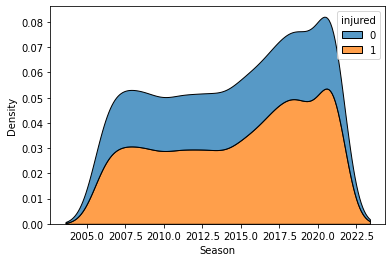

In [ ]:
import seaborn as sns
sns.kdeplot(data=df, x="Season", hue="injured", multiple="stack")


In [ ]:
df_2=df.drop(["Name","Team","team_id","player_id","Dollars","Age_Rng"],axis=1)

##PCA


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df_transform=df_2.drop(["injured"],axis=1)
df_transform = StandardScaler().fit_transform(df_2)
pca = PCA(n_components=0.99).fit(df_transform)
new_df = pca.transform(df_transform)
var_exp = pca.explained_variance_ratio_

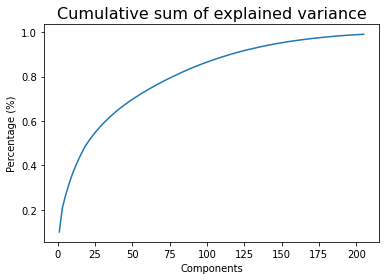

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(var_exp) + 1), var_exp.cumsum())
plt.title('Cumulative sum of explained variance', fontsize=16)
plt.xlabel('Components')
plt.ylabel('Percentage (%)')
plt.show()

## SPLIT

In [ ]:
train = df_2[df_2['Season'] <= 2019]
validation= df_2[(df_2["Season"] == 2020)]
test= df_2[df_2["Season"]==2021]

In [ ]:
### select features that have high importance level 
#split dataset with train,test,validation set based on Seasons
train = df_2[df_2['Season'] <= 2019]
validation= df_2[(df_2["Season"] == 2020)]
test= df_2[df_2["Season"]==2021]
#define X and Y
X_train=train.drop(['injured'], axis = 1)
X_test=test.drop(['injured'], axis = 1)
X_vali=validation.drop(['injured'], axis = 1)
Y_train=train['injured']
Y_test=test['injured']
Y_vali=validation['injured']

In [ ]:
test.injured.value_counts()

1    724
0    338
Name: injured, dtype: int64

##model

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, Y_train)

predictions = randomforest_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, randomforest_model.predict_proba(X_vali)[:, 1]))

[[127  89]
 [128 162]]
accuracy_score: 0.5711462450592886
Precision_score: 0.6454183266932271
F1_score: 0.5988909426987061
Roc_acu 0.5849217752234993


In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)

predictions = LR_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, LR_model.predict_proba(X_vali)[:, 1]))

[[ 66 150]
 [ 58 232]]
accuracy_score: 0.5889328063241107
Precision_score: 0.6073298429319371
F1_score: 0.6904761904761905
Roc_acu 0.610265006385696


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model = XGBClassifier().fit(X_train, Y_train)

predictions = xgb_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, xgb_model.predict_proba(X_vali)[:, 1]))

[[ 97 119]
 [ 73 217]]
accuracy_score: 0.6205533596837944
Precision_score: 0.6458333333333334
F1_score: 0.6932907348242812
Roc_acu 0.634227330779055


In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

mnb=GaussianNB()
mnb_model = mnb.fit(X_train, Y_train)
predictions = mnb_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, mnb_model.predict_proba(X_vali)[:, 1]))

[[179  37]
 [218  72]]
accuracy_score: 0.49604743083003955
Precision_score: 0.6605504587155964
F1_score: 0.3609022556390977
Roc_acu 0.528719667943806


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp_model = mlp.fit(X_train, Y_train)
predictions = mlp_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, mlp_model.predict_proba(X_vali)[:, 1]))

[[ 25 191]
 [ 20 270]]
accuracy_score: 0.5830039525691699
Precision_score: 0.5856832971800434
F1_score: 0.7190412782956059
Roc_acu 0.524074074074074


In [ ]:
from numpy import positive
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
svm=SVC(probability=True)
svm_model = svm.fit(X_train, Y_train)
predictions = svm_model.predict(X_vali)

actuals = Y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_acu", roc_auc_score(actuals, svm_model.predict_proba(X_vali)[:, 1]))

[[107 109]
 [146 144]]
accuracy_score: 0.49604743083003955
Precision_score: 0.5691699604743083
F1_score: 0.5303867403314918
Roc_acu 0.5049169859514686
